#         Classification on Imbalanced Data using Python and Machine Learning

In machine learning, imbalanced data happens when one class in a classification problem has a lot more examples than the other. This imbalance can make models biased toward the majority class, leading to poor performance in identifying the minority class, which is often more important. Addressing this issue requires thoughtful handling, including strategies like data preprocessing, resampling techniques, selecting the right model, and using evaluation metrics that account for the imbalance.

Great! Let's start by importing the essential Python libraries for handling imbalanced classification problems, followed by loading the dataset.

In [18]:
#Importing necesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Read the CSV file into a pandas DataFrame object
data=pd.read_csv(r"C:\Users\shaha74\Insurance claims data.csv")
print(data.head())

   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_central_locking is_power_steer


Let's have a quick look at the column information

In [20]:
# Print a concise summary of the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [21]:
#Checking the number of null values for each column
print(data.isnull().sum())

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight


 The dataset contains 58,592 entries and 41 columns, including the target variable claim_status. And we dont have null values, which will save a lot of time for us in terms of handling missing values

Here’s an overview of the dataset features:

**policy_id:** A unique identifier for each insurance policy

**subscription_length, vehicle_age, customer_age:** Numeric attributes related to the policy, vehicle, and customer details

**region_code, segment, model, fuel_type:** Categorical features describing the vehicle's region, segment, model, and fuel type

**max_torque, max_power, engine_type:** Specifications of the vehicle’s engine performance

**airbags, is_esc, is_adjustable_steering:** Features focused on vehicle safety and convenience

**claim_status:** The target variable indicating whether a claim was made (1) or not (0).

Next we will perform `Exploratory Data Analysis (EDA)` to visualise and gain insights into the distributions, relationships, and patterns within the dataset. This will include analyzing the distribution of the target variable and key features. we'll begin by visualizing the distribution of claim_status to assess the class balance.

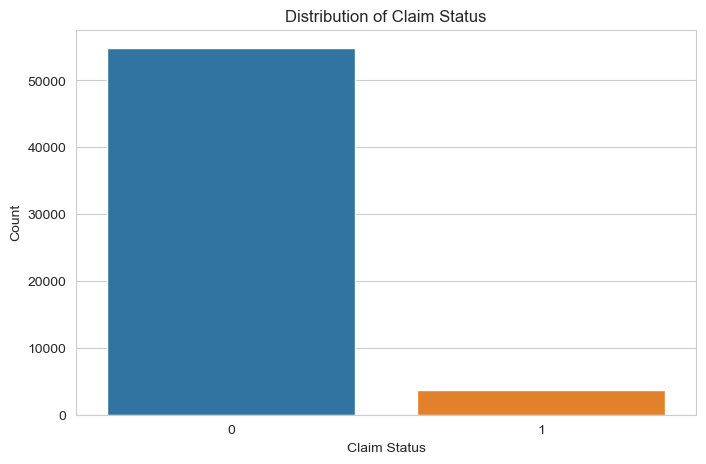

In [22]:
sns.set_style("whitegrid")

# plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(8, 5))
sns.countplot(x=data['claim_status'])
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

The distribution of claim_status reveals a notable imbalance between the two classes, with far fewer `claims (1)` compared to `no claims (0)`. This imbalance poses a challenge during model training, as it can lead to bias toward predicting the majority class. Addressing this imbalance will be crucial to ensure the model performs well on both classes.

After this, we'll analyze both numerical and categorical features to better understand their distributions and relationships with claim_status. Let's begin by exploring the distributions of key numerical features like `subscription_length`, `vehicle_age`, and `customer_age`.

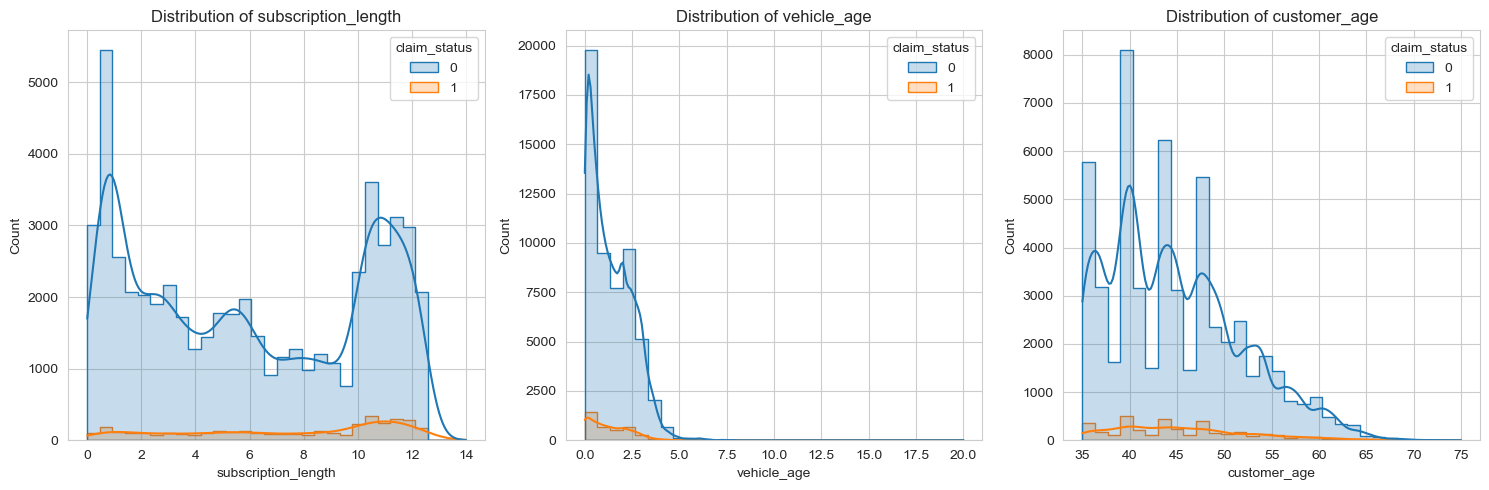

In [23]:
# selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

# plotting distributions of numerical features
plt.figure(figsize=(15, 5))
for i,column in enumerate (numerical_columns,1):
    plt.subplot(1,3,i)
    sns.histplot(x=data[column],data=data,kde=True,bins=30,element='step',hue='claim_status')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

The distributions of the numerical features subscription_length, vehicle_age, and customer_age exhibits the following characteristics:

**subscription_length:** The majority of values are concentrated around lower numbers, suggesting that many policies have shorter subscription lengths.

**vehicle_age:** This distribution is skewed at lower values, with noticeable spikes at certain ages, which may indicates that generally vehicles with less age are registered for the insurances.

**customer_age:** The distribution appears to be fairly normal, with most customers falling within a middle-age range.

Next, We will examine relevant categorical features to understand their variation and relationship with claim_status. I'll focus on features such as `region_code`, `segment`, and `fuel_type`.

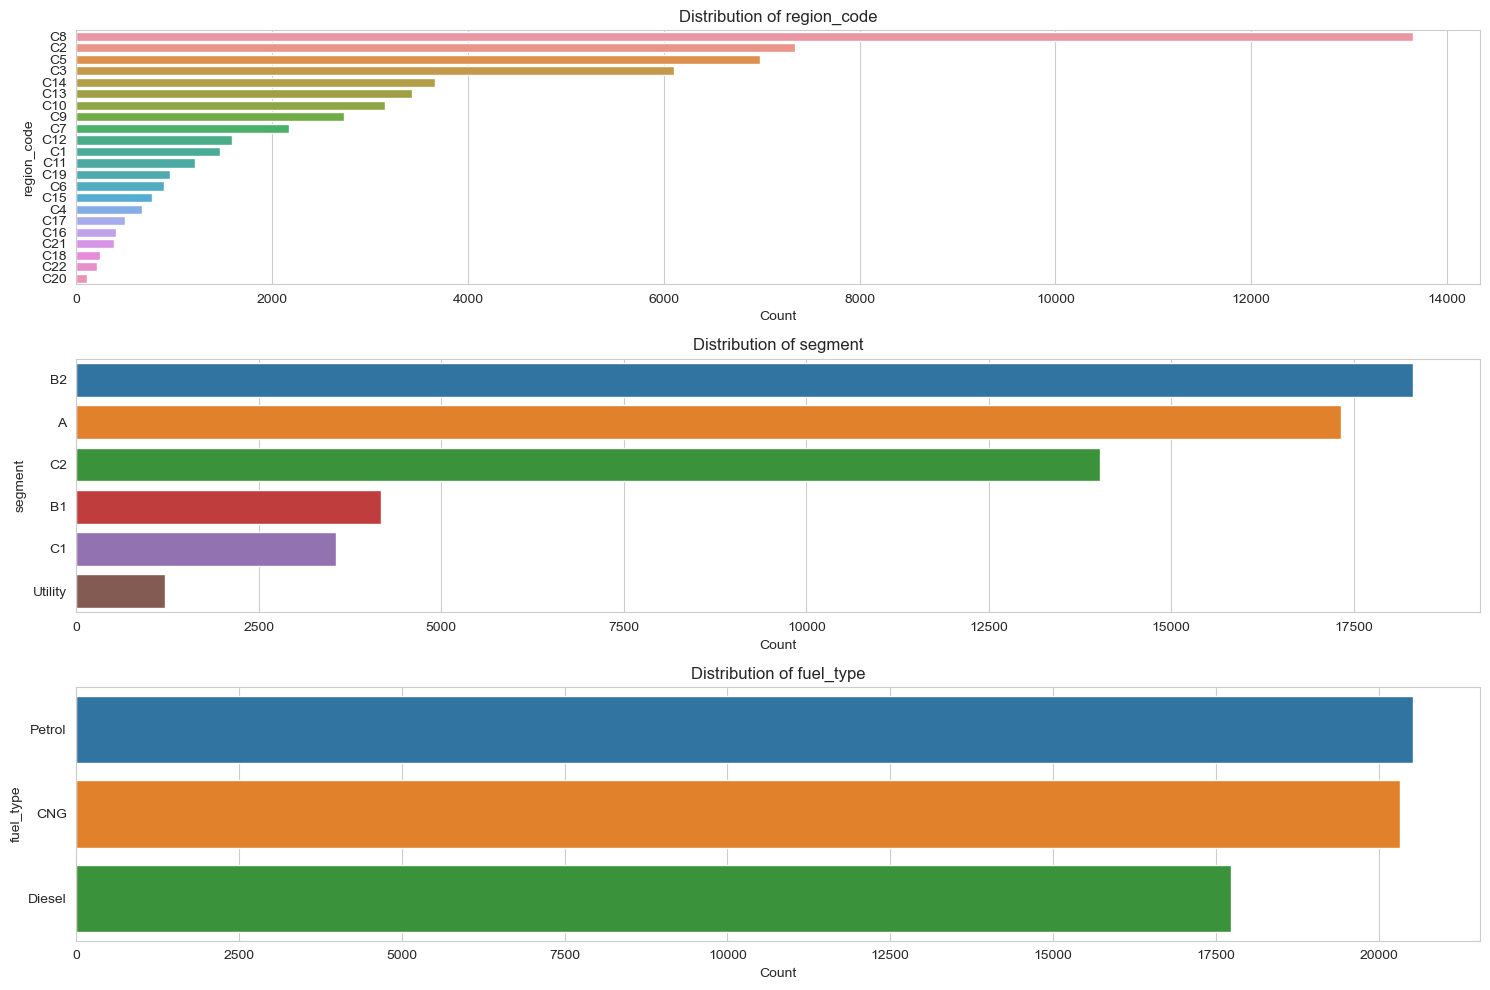

In [24]:
# selecting some relevant categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i,column in enumerate (categorical_columns,1):
    plt.subplot(3,1,i)
    sns.countplot(y=data[column],data=data,order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

For `region_code`, there is a broad range of codes, each with different counts; however, a few specific codes stand out with significantly higher frequencies than the rest. In the distribution of `segment`, there are fewer categories, with the `B2` segment being the most prevalent, followed by `A` and `C2`, while the `Utility` segment appears to be the least common. Finally, in terms of `fuel_type`, there are three categories, with `Petrol` having the highest count, followed by `CNG` and `Diesel`.

## Handling Imbalance Class

The next step is to balance the dataset through oversampling to address the class imbalance seen in `claim_status`.

In [25]:
from sklearn.utils import resample

#separate the majority and minority class based on the target variable
majority=data[data['claim_status']==0]
minority=data[data['claim_status']==1]

oversampled_minority=resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

#concatenate the majority and oversampled minority class and make a new dataframe
oversampled_data=pd.concat([majority,oversampled_minority])

print(oversampled_data.value_counts('claim_status'))

claim_status
0    54844
1    54844
Name: count, dtype: int64


After performing oversampling on the minority class, both classes are balanced with `54,844` entries each. Now, again let’s have a look at some key numerical  variables to see what the balanced data looks like:

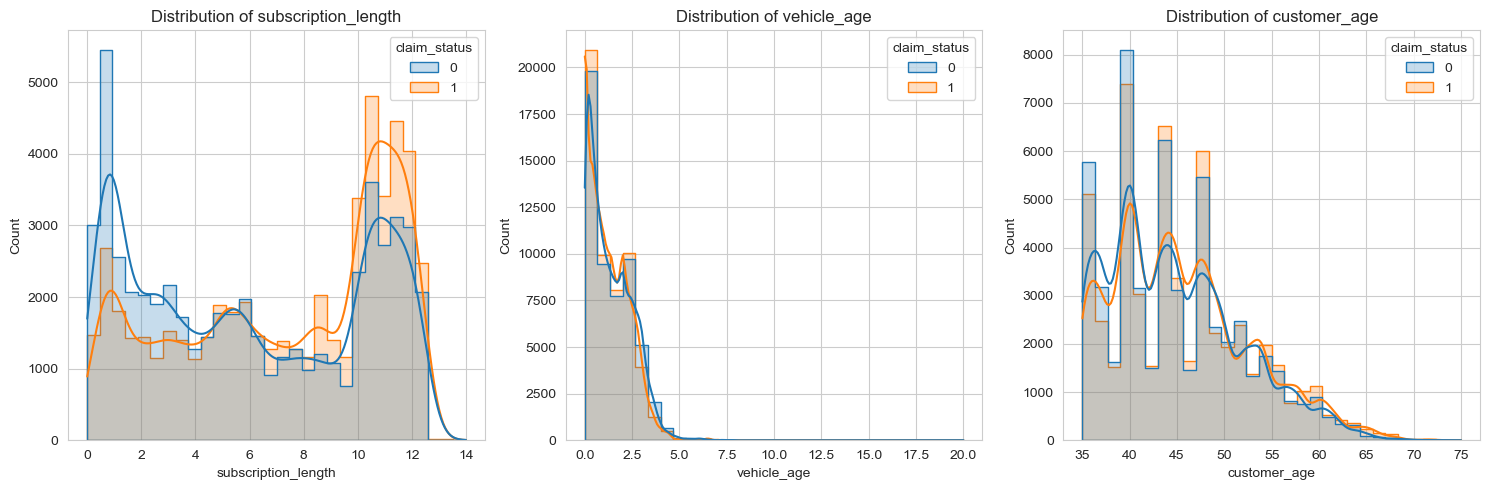

In [26]:
# selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

# plotting distributions of numerical features
plt.figure(figsize=(15, 5))
for i,column in enumerate (numerical_columns,1):
    plt.subplot(1,3,i)
    sns.histplot(x=oversampled_data[column],data=oversampled_data,kde=True,bins=30,element='step',hue='claim_status')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

## Feature Importance

Now, we will identify the most important variables for predicting insurance frequency claims by analyzing both categorical and numerical features to assess their impact on the target variable. We will employ `feature importance` techniques that are appropriate for both types of variables. To begin with feature selection, we will first convert the categorical columns to suitable types using a `Label Encoder`.

In [32]:
#Encoding the columns with object datatype to suitable datatypes
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

def encode_columns(col):
    if col.dtype=='object':
        return  le.fit_transform(col)
    else:
        return col

#applying the function to original dataframe
encoded_data=data.apply(encode_columns)

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

x=encoded_data.drop(['policy_id','claim_status'],axis=1)
y=encoded_data['claim_status']

rf.fit(x,y)

#Get the feature importance of columns from the trained model
feature_importance=rf.feature_importances_

features_df=pd.DataFrame({'Features':x.columns,
                          'Importance':feature_importance})
features_df=features_df.sort_values(by='Importance',ascending=False)

# displaying the top 10 important features
print(features_df.head(10)) 

               Features  Importance
0   subscription_length    0.413884
2          customer_age    0.267505
1           vehicle_age    0.195322
4        region_density    0.058227
3           region_code    0.055812
6                 model    0.000928
23               length    0.000680
25         gross_weight    0.000631
5               segment    0.000572
10          engine_type    0.000542




The top 10 most important variables for predicting insurance frequency claims, based on the Random Forest model, are:

1. **subscription_length**: The duration of the insurance subscription
2. **customer_age**: The age of the customer
3. **vehicle_age**: The age of the vehicle
4. **region_density**: The population density of the region
5. **region_code**: The code representing the region
6. **model**: The model of the vehicle
7. **length**: The length of the vehicle
8. **gross_weight**: The gross weight of the vehicle
9. **segment**: The model segment
10. **engine_type**: The type of engine in the vehicle

These variables appear to significantly influence the likelihood of an insurance claim being made. However, it’s important to note that `policy_id` has a very high importance score, which may not be intuitively relevant for prediction. Therefore, we should ensure to drop the `policy_id` column during model training.

## Model Training

The next step is to create a predictive model using the oversampled data. Since this is a binary classification task, suitable algorithms include logistic regression, random forest, or gradient boosting. Given the effectiveness of random forests in managing both numerical and categorical data and their capability to model complex interactions, we will proceed with a Random Forest classifier.

In [29]:
#Apply the encoding function to oversampled dataframe
encoded_oversampled_data=oversampled_data.apply(encode_columns)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


x=encoded_oversampled_data.drop(['policy_id','claim_status'],axis=1)
y=encoded_oversampled_data['claim_status']

#split the data into training and test dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#Applying the model to oversampled data
rf_oversampled=rf.fit(x_train,y_train)

y_pred_oversampled=rf.predict(x_test)

print(classification_report(y_test,y_pred_oversampled))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



The classification report provides several metrics to evaluate the performance of the predictive model on the test data. Here’s a breakdown of the results:

- **Class 0 (no claim)**: 
  - **Precision** is `1.00`, meaning the model correctly predicts no claims `100%` of the time.
  - **Recall** is `0.96`, indicating that the model identifies `96%` of all actual no-claim instances.

- **Class 1 (claim)**:
  - **Precision** is `0.96`, showing that when the model predicts a claim, it is correct `96%` of the time.
  - **Recall** is `1.00`, demonstrating that the model accurately identifies `100%` of all actual claim instances.

- The **F1-score** for both classes is `0.98`, indicating a strong balance between precision and recall. This suggests that the model is both accurate and reliable in its predictions for both classes.

- The **overall accuracy** of the model is `0.98`, meaning it correctly predicts the claim status in `98%` of the cases within the test dataset.

- The **macro average** for precision, recall, and F1-score is `0.98`, reflecting the model's average performance across both classes without accounting for the imbalance in class distribution. This high value indicates that the model performs well for both classes.

- The **weighted average** for precision, recall, and F1-score is also `0.98`, which considers the imbalance in class distribution. This suggests that the model performs consistently well across different classes when taking into account their distribution in the dataset.

These results demonstrate that the model is highly effective in predicting insurance claims, with robust performance metrics for both classes of outcomes. The high recall for claims (class 1) is especially significant, as it indicates that the model excels at identifying instances where claims occur. This is often the main concern in imbalanced datasets, making the model's ability to accurately detect claims particularly valuable.

Now, let's apply the machine learning model to the original dataset and evaluate its performance on the imbalanced data. This will help us understand how well the model generalizes to the original distribution of classes.

In [30]:
x=encoded_data.drop(['policy_id','claim_status'],axis=1)
y=encoded_data['claim_status']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

#Applying the model to original data
rf=rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     16434
           1       0.06      0.01      0.01      1144

    accuracy                           0.93     17578
   macro avg       0.50      0.50      0.49     17578
weighted avg       0.88      0.93      0.90     17578



The classification report provides several metrics to evaluate the performance of the predictive model on the original imbalanced dataset. Here’s a breakdown of the results:

**Class 0 (no claim)**:
- **Precision** is 0.93, meaning the model correctly predicts no claims 93% of the time.
- **Recall** is 0.99, indicating that the model identifies 99% of all actual no-claim instances.

**Class 1 (claim)**:
- **Precision** is 0.06, showing that when the model predicts a claim, it is correct only 6% of the time.
- **Recall** is 0.01, demonstrating that the model accurately identifies just 1% of all actual claim instances.

The **F1-score** for class 0 is 0.96, indicating a strong balance between precision and recall for this class, while the F1-score for class 1 is 0.01, reflecting significant challenges in predicting claims.

The **overall accuracy** of the model is 0.93, meaning it correctly predicts the claim status in 93% of the cases within the original dataset.

The **macro average** for precision, recall, and 49-score is 0.50, reflecting the model's average performance across both classes without accounting for the imbalance in class distribution. This suggests the model struggles significantly with the minority class.

The **weighted average** for precision, recall, and F1-score is 0.88, 0.93, and 0.90 respectively, which considers the imbalance in class distribution. This indicates that the model performs reasonably well on average across different classes, particularly for the majority class.


Now, let’s label the original imbalanced data and predicted using our model,together to see how many instances are correctly classified from our model:

In [31]:
comparison_df=pd.DataFrame({'Original':y_test,
                            'Predicted':y_pred})

print(comparison_df)

       Original  Predicted
29918         0          0
5034          0          0
38100         0          0
17050         0          0
35146         0          0
...         ...        ...
40208         0          0
15643         1          0
24026         0          0
56292         0          1
42756         1          0

[17578 rows x 2 columns]


## Summary 

The predictive model demonstrates robust performance on the oversampled dataset, achieving an accuracy of 99% and effectively identifying claims with high precision and recall.  In contrast, on the original imbalanced dataset, the accuracy drops to 93%, with the precision for claims (class 1) plummeting to just 6% and recall at only 1%. This stark difference highlights the challenges the model faces when dealing with imbalanced data, where it struggles to accurately predict the minority class.